In [2]:
import numpy as np
import matplotlib.pyplot as plt

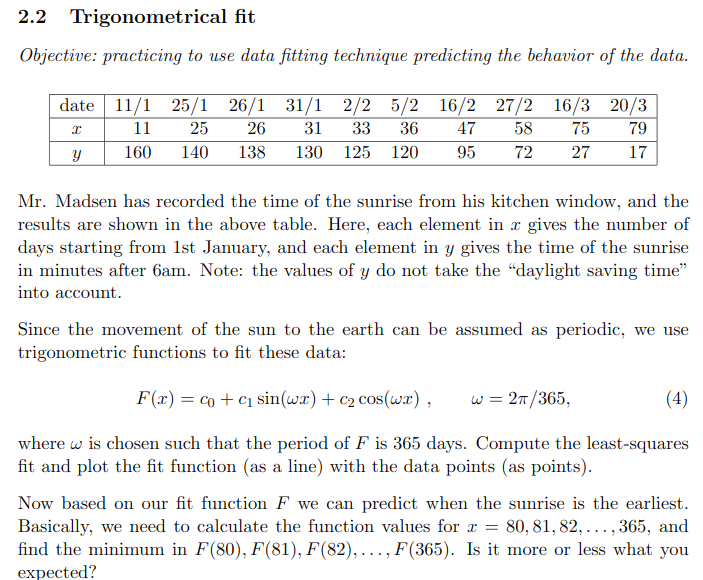

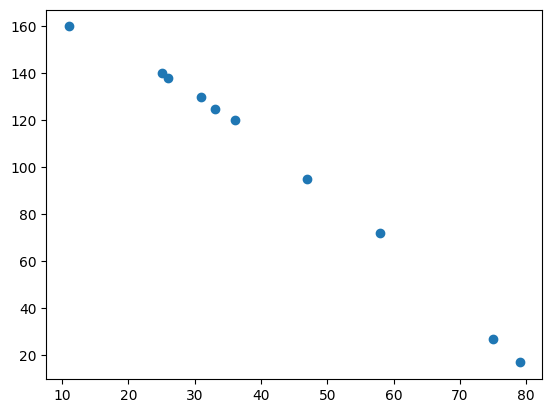

In [3]:
x = np.array([11, 25, 26, 31, 33, 36, 47, 58, 75, 79]).T
y = np.array([160, 140, 138, 130, 125, 120, 95, 72, 27, 17]).T

In [4]:
w = 2*np.pi/365

A = np.array([np.ones(len(x)), np.sin(w*x), np.cos(w*x)]).T
c = np.linalg.solve(A.T@A,A.T@y)
c

array([ 26.77224522, -40.49390279, 143.16124837])

In [7]:
xx = np.linspace(min(x), 365, 100)
yy = c[0] + c[1]*np.sin(w*xx) + c[2]*np.cos(w*xx)

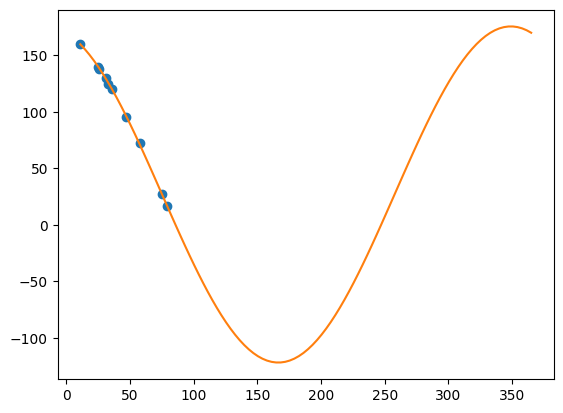

In [8]:
plt.plot(x,y,'o')
plt.plot(xx,yy)

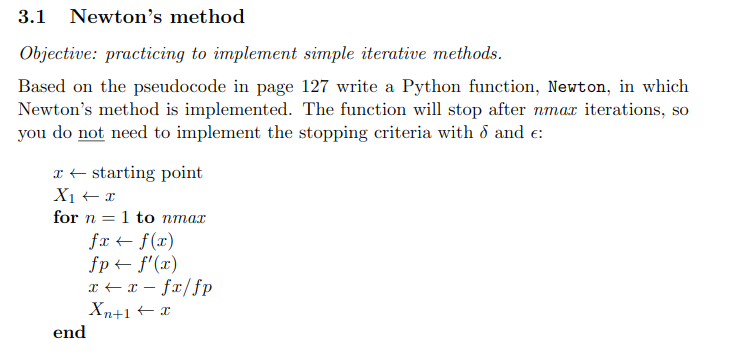
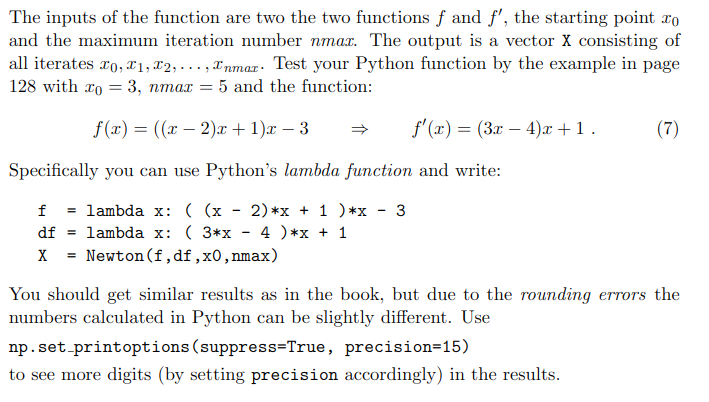

In [15]:
def newton(f, df, x0, nmax):
    x = x0
    iterates = [x0]
    for n in range(nmax):
        x = x - f(x)/df(x)
        iterates.append(x)
    return iterates
    
f = lambda x: ((x-2)*x + 1)*x - 3
df = lambda x: (3*x - 4)*x + 1
X = newton(f, df, 3, 5)

In [16]:
X

[3,
 2.4375,
 2.2130327163151096,
 2.175554938721488,
 2.174560100666446,
 2.1745594102933126]

In [14]:
f(X[-1])

-8.881784197001252e-16

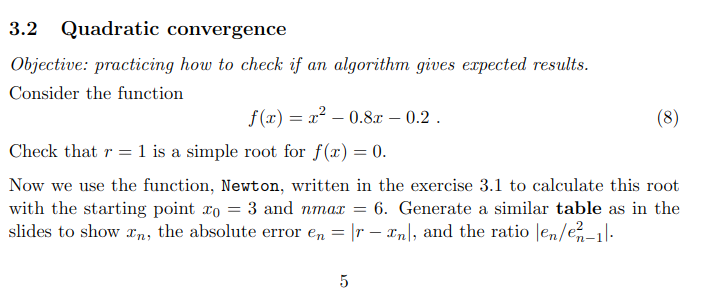
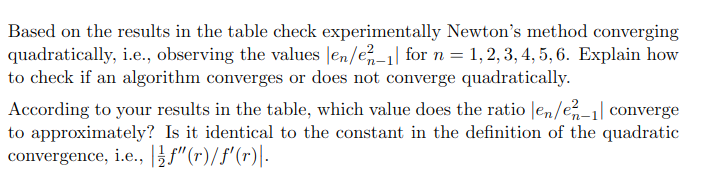

In [20]:
f = lambda x: x**2 - 0.8*x - 0.2
df = lambda x: 2*x - 0.8
nmax = 6
x0 = 3

X = newton(f, df, x0, nmax)
X

[3,
 1.7692307692307694,
 1.216076058772688,
 1.0286057057261024,
 1.0006508741430713,
 1.0000003526484091,
 1.0000000000001037]

In [25]:
def newton_convergence(r, X):
    error = [[abs(r-X[0]), None]]
    for i in range(len(X)):
        if i == 0: pass
        en = abs(r-X[i])
        error.append([en,abs(en/error[i-1][0]**2)])
    return error

In [26]:
newton_convergence(1, X)

[[2, None],
 [2, 0.5],
 [0.7692307692307694, 0.19230769230769235],
 [0.21607605877268798, 0.054019014693171996],
 [0.028605705726102437, 0.0483436426771131],
 [0.0006508741430713005, 0.013940672331972055],
 [3.526484091409543e-07, 0.00043095963601847776],
 [1.0369483049998962e-13, 2.447727506214001e-07]]

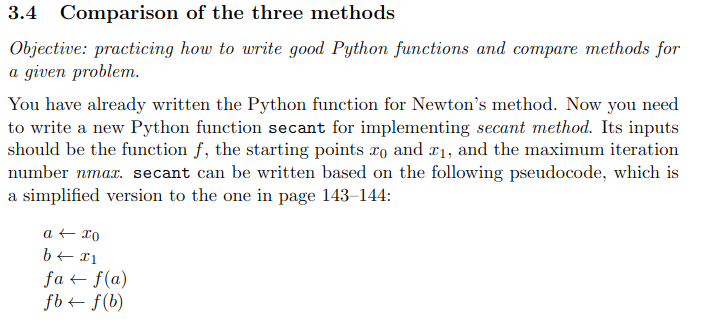
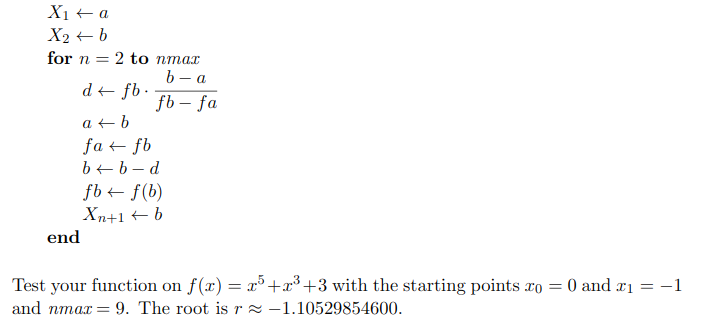
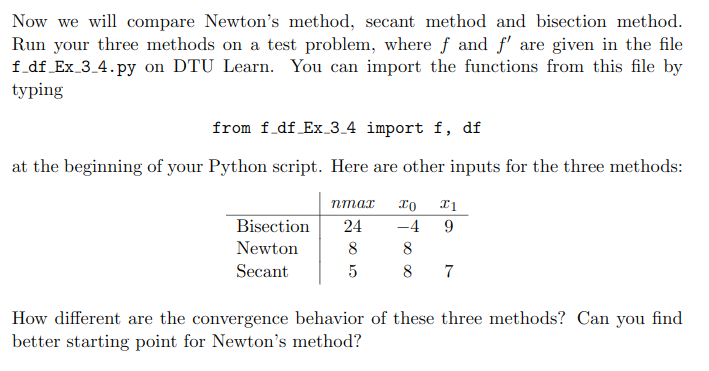

In [1]:
def secant(f, x0, x1, n_max):
    a = x0
    b = x1
    f_a = f(a)
    f_b = f(b)
    X = [a, b]
    for n in range(1,n_max, 1):
        d = f_b * (b-a)/(f_b - f_a)
        a = b
        f_a = f_b
        b = b - d
        f_b = f(b)
        X.append(b)
    return X

In [2]:
f = lambda x: x**5 + x**3 + 3
x0 = 0
x1 = -1
n_max = 9
secant(f, x0, x1, n_max)

[0,
 -1,
 -1.5,
 -1.0557491289198606,
 -1.0825521565950564,
 -1.1070953658726013,
 -1.105235826838816,
 -1.1052983758843113,
 -1.1052985460222975,
 -1.1052985460061695]